# Import Libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

from art.estimators.classification import SklearnClassifier
from art.attacks.evasion import DecisionTreeAttack

# Load Data

In [2]:
X, y = load_digits(return_X_y=True)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Train

In [7]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

# Test

In [10]:
safe_preds = dt.predict(x_test)

In [13]:
safe_model_scores = {
    'ACC': accuracy_score(y_test, safe_preds),
    'PREC': precision_score(y_test, safe_preds, average='weighted'),
    'REC': recall_score(y_test, safe_preds, average='weighted'),
    'F1': f1_score(y_test, safe_preds, average='weighted')
}

In [14]:
safe_model_scores

{'ACC': 0.8111111111111111,
 'PREC': 0.820180754917597,
 'REC': 0.8111111111111111,
 'F1': 0.8089258645856277}

# Attack

In [15]:
art_dt = SklearnClassifier(model=dt)

In [16]:
attack = DecisionTreeAttack(art_dt)

In [17]:
adv_test = attack.generate(x_test)

Decision tree attack:   0%|          | 0/180 [00:00<?, ?it/s]

In [21]:
adv_preds = dt.predict(adv_test)

# Results

In [22]:
adv_model_scores = {
    'ACC': accuracy_score(y_test, adv_preds),
    'PREC': precision_score(y_test, adv_preds, average='weighted'),
    'REC': recall_score(y_test, adv_preds, average='weighted'),
    'F1': f1_score(y_test, adv_preds, average='weighted')
}

/home/alper/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
adv_model_scores

{'ACC': 0.016666666666666666,
 'PREC': 0.00703030303030303,
 'REC': 0.016666666666666666,
 'F1': 0.009413067552602435}

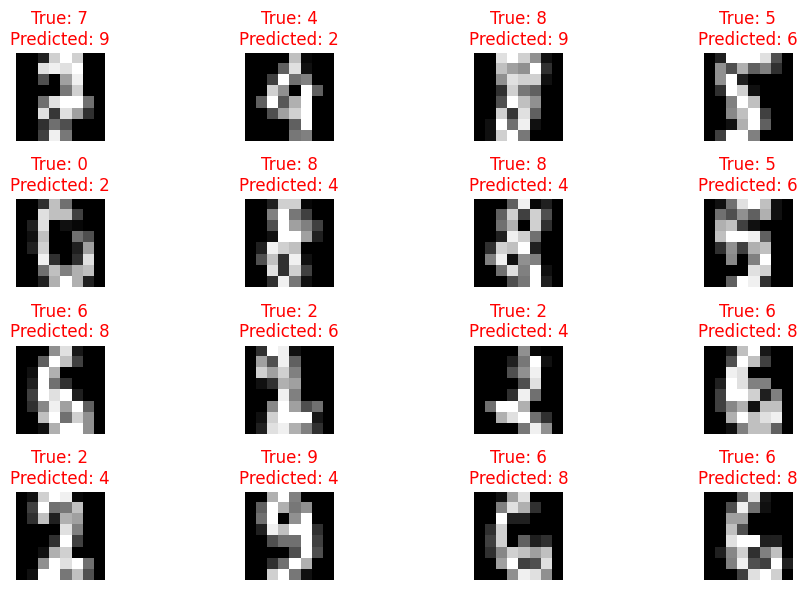

In [35]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 6))
random_index = np.random.randint(0, len(adv_test), 16)

for i, ax in enumerate(axes.ravel()):
    ax.imshow(adv_test[i].reshape(8, 8), cmap='gray')
    ax.axis('off')

    if y_test[i] == adv_preds[i]:
        color = 'green'
    else:
        color = 'red'

    ax.set_title(
        f'True: {y_test[i]}\nPredicted: {adv_preds[i]}',
        color=color
    )

plt.tight_layout()
plt.show()